In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In [8]:
file = "../code/data/other/combined.times"
df = pd.read_csv(file)
print(df)

              inst  iter           alg      time
0         er100000     0        Dinics    356069
1         er100000     0     DinicsOPT      3352
2         er100000     0   PushRelabel    147401
3         er100000     0  BK-Algorithm   3208853
4         er100000     1        Dinics    362712
...            ...   ...           ...       ...
1195  liver.n6c100    48  BK-Algorithm  11330200
1196  liver.n6c100    49        Dinics  75713595
1197  liver.n6c100    49     DinicsOPT  75007410
1198  liver.n6c100    49   PushRelabel  24193007
1199  liver.n6c100    49  BK-Algorithm  11326705

[1200 rows x 4 columns]


# all times are in us (seconds * 1e-6)

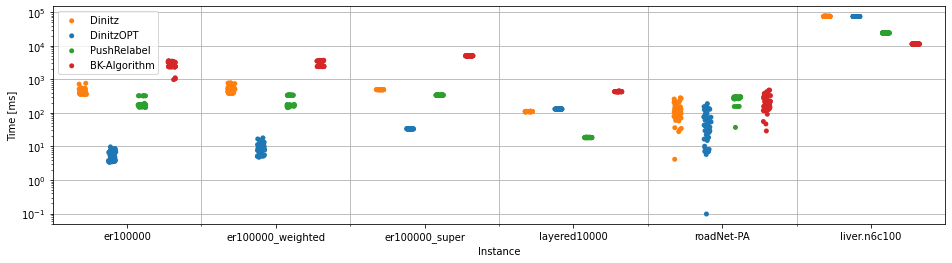

In [11]:

colors = {'DinicsOPT': 'C0','Dinics': 'C1','PushRelabel': 'C2','BK-Algorithm': 'C3'}
labels = ['Dinitz', 'DinitzOPT', 'PushRelabel', 'BK-Algorithm']

# convert to milliseconds
df['time-ms'] = df.time / 1000

fig, ax = plt.subplots(figsize=(16,4))
ax = sns.stripplot(x='inst', y='time-ms', data=df, hue='alg', dodge=True, palette=colors)
ax.legend(loc='upper left', labels=labels)

ax.set_ylabel('Time [ms]')
ax.set_xlabel('Instance')
#ax.set_ylim(1.0, ax.get_ylim()[1])
ax.semilogy()

# grid and size
num_inst = df.inst.nunique()
ax.set_xticks([x+0.5 for x in range(0,num_inst-1)], minor=True)
ax.set_xlim(-0.5, num_inst-0.5)
ax.grid(which='minor', axis='x')
ax.grid(which='major', axis='y')

plt.savefig('eval_runtime_other.pdf', bbox_inches='tight')
plt.show()